In [4]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.integrate import odeint, solve_ivp
from scipy.stats import beta
from local_functions import *

################################################################################
def plotSweep(var1, var2, data, zvar='x', zfun=None, intention=True, coevolving=True, 
    ax=None, fig=None, cbar=True, normalize=True):
    '''Wrapper for varying 2 simulation parameters.
    
    Parameters
    ----------
    var1 : tuple or list
       A list with 2 elements. The first element is the name of a keyword 
       argument for the function `simulate`. The second element is a list
       or array of variable values that should be considered in the 
       parameter sweep.
       
    var2 : tuple or list
       A list with 2 elements. The first element is the name of a keyword 
       argument for the function `simulate`. The second element is a list
       or array of variable values that should be considered in the 
       parameter sweep.
       
    data : 3d array
       Array with simulation results
       
    zvar : string in ['x'|'y'|'L'] (default='x')
       Indicates which output variable should be plotted.
       
    zfun : python function (default=numpy.mean)
       Heatmaps will show `zfun(zvar)` as color variable.
    '''    
    # get number of nodes from data dimension           
    n = nFromData(len(data[0,0]), intention=intention, coevolving=coevolving)
    
    if zvar == 'x':
        data_z = data[:,:,-2*n:-n]
    elif zvar == 'y':
        data_z = data[:,:,-n:]
    elif zvar == 'L':
        nd = np.where(np.ravel(np.eye(n))==0)
        data_z = np.squeeze(data[:,:,nd], axis=-1)

    else:
        print("Error in plotSweep:",
             "Unknown value for 'zvar'.")
        return 0
    
    if zfun is None:
        zfun = np.mean
        
    z = np.array([[zfun(data_z[i,j]) 
                   for i in range(len(data))] 
                  for j in range(len(data[0]))])
    if normalize:
        z = z/z[0,0]
    
    if ax is None:
        ax = plt.subplot(111)
        
    im = ax.pcolormesh(var1[1], var2[1], z)
    ax.set_xlabel(var1[0])
    ax.set_ylabel(var2[0])
    
    if cbar:
        if fig is None:
            fig = plt.gcf()
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='5%', pad=0.05)     
        fig.colorbar(im, cax=cax, orientation='vertical')    
        if normalize:
            cax.set_ylabel(r'$x(t\rightarrow\infty)/x^{(0,0)}(t\rightarrow\infty)$')
        else:
            cax.set_ylabel(r'$x(t\rightarrow\infty)$')

### 1. Comparing the effect of initial conditions and input functions (i.e., interventions)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\alice\anaconda3\envs\muri2\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\alice\AppData\Local\Temp\ipykernel_5384\2664028338.py", line 22, in <cell line: 22>
    data = sweep(v1, v2, {'coevolving':True, 'intention':True})
  File "C:\Users\alice\Google Drive\jupyter\adoption-model\local_functions.py", line 458, in sweep
  File "C:\Users\alice\Google Drive\jupyter\adoption-model\local_functions.py", line 421, in simulateRectangular
    # call 'simulate'
TypeError: simulate() got an unexpected keyword argument 'mindfulness_length'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\alice\anaconda3\envs\muri2\lib\site-packages\IPython\core\interactiveshell.py", line 1982, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\alice\anaconda3\

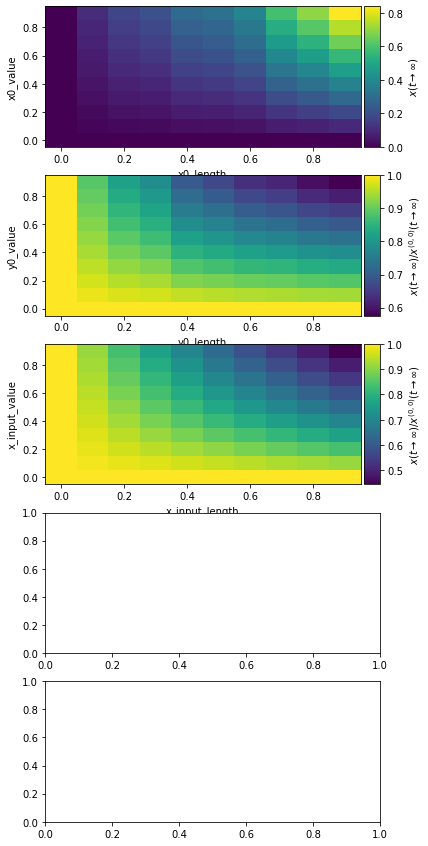

In [5]:
fig = plt.figure()
fig.set_size_inches((6,15))
axes = [plt.subplot(5,1,1+i) for i in range(5)]

v1 = ['x0_length', np.arange(0., 1., 0.1)]
v2 = ['x0_value', np.arange(0., 1., 0.1)]
data = sweep(v1, v2, {'coevolving':True, 'intention':True})
plotSweep(v1, v2, data, ax=axes[0], normalize=False)

v1 = ['y0_length', np.arange(0., 1., 0.1)]
v2 = ['y0_value', np.arange(0., 1., 0.1)]
data = sweep(v1, v2, {'coevolving':True, 'intention':True})
plotSweep(v1, v2, data, ax=axes[1], normalize=True)

v1 = ['x_input_length', np.arange(0., 1., 0.1)]
v2 = ['x_input_value', np.arange(0., 1., 0.1)]
data = sweep(v1, v2, {'coevolving':True, 'intention':True})
plotSweep(v1, v2, data, ax=axes[2], normalize=True)

v1 = ['mindfulness_length', np.arange(0., 1., 0.1)]
v2 = ['mindfulness_value', np.arange(0., 1., 0.1)]
data = sweep(v1, v2, {'coevolving':True, 'intention':True})
plotSweep(v1, v2, data, ax=axes[3], normalize=True)

v1 = ['perspective_taking_length', np.arange(0., 1., 0.1)]
v2 = ['perspective_taking_value', 10*np.arange(0., 1., 0.1)]
data = sweep(v1, v2, {'coevolving':True, 'intention':True})
plotSweep(v1, v2, data, ax=axes[4], normalize=True)

plt.subplots_adjust(hspace=0.3)
plt.savefig('parameter_heatmaps.png', dpi=300)